In [5]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
customers = pd.read_csv('L06_Ecommerce_Customers.csv')
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
customers.loc[:, ['Time on Website', 'Yearly Amount Spent']]

,Time on Website,Yearly Amount Spent
0,39.577668,587.951054
1,37.268959,392.204933
2,37.110597,487.547505
3,36.721283,581.852344
4,37.536653,599.406092
...,...,...
495,36.417985,573.847438
496,37.190268,529.049004
497,38.332576,551.620145
498,36.840086,456.469510


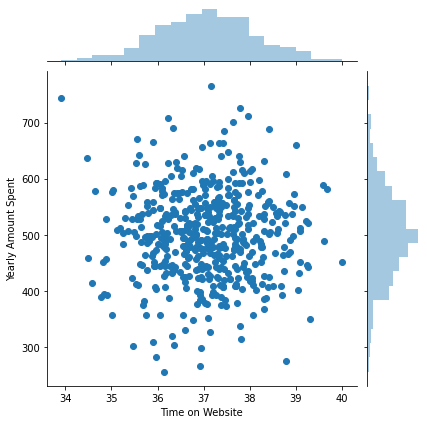

In [10]:
sns.jointplot( x='Time on Website', y='Yearly Amount Spent', data=customers)

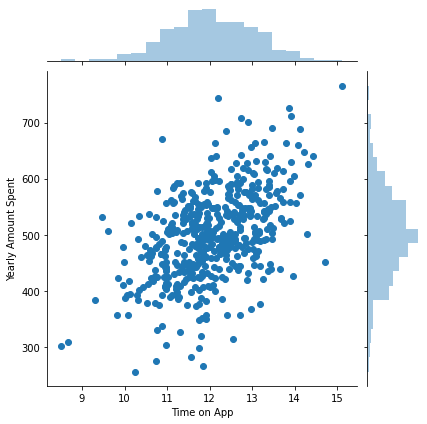

In [11]:
sns.jointplot( x='Time on App', y='Yearly Amount Spent', data=customers)


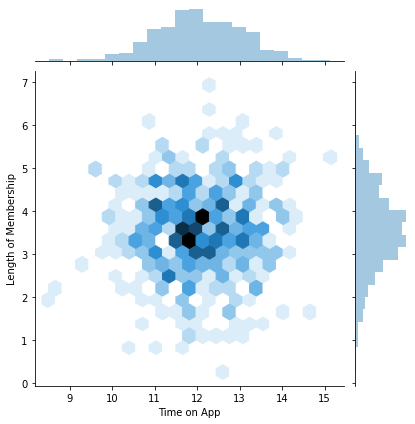

In [12]:
sns.jointplot( x='Time on App', y='Length of Membership', data=customers, kind='hex?reg')

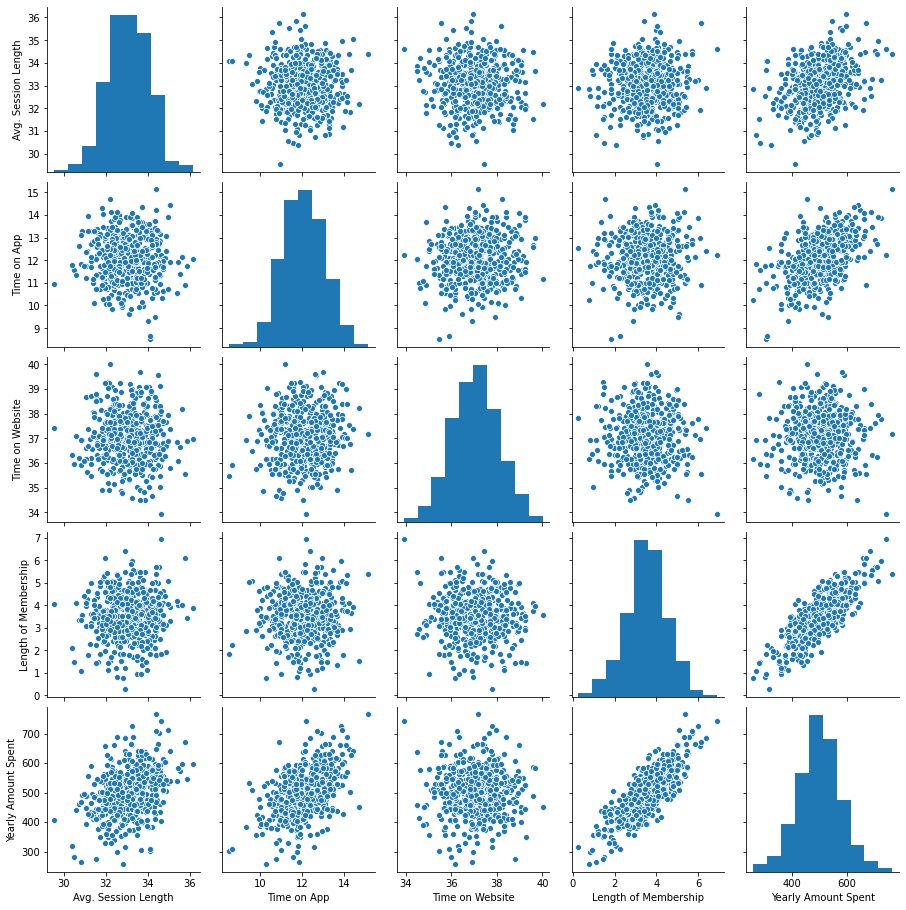

In [13]:
sns.pairplot(data=customers)

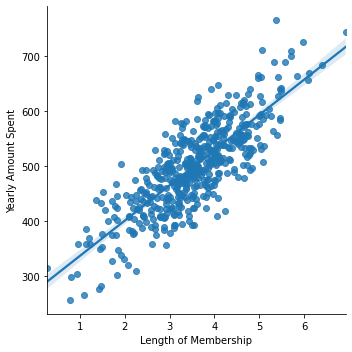

In [14]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = customers.iloc[:, 3:7]
y = customers['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm = LinearRegression().fit(X_train, y_train)
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

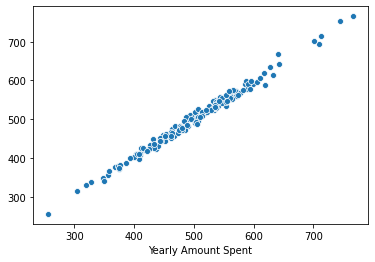

In [26]:
y_prediction = lm.predict(X_test)
sns.scatterplot(x=y_test, y=y_prediction)

In [31]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = math.sqrt(mse)

In [33]:
print(f"MAE: {mae}\nMSE: {mse}\nRMSE: {rmse}")

MAE: 7.2281486534308295
MSE: 79.8130516509743
RMSE: 8.933815066978626


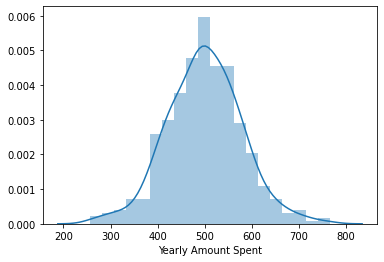

In [34]:
sns.distplot(customers['Yearly Amount Spent'])

In [60]:
coef = pd.DataFrame({'Coeffecient':lm.coef_}, index=['Avg. Session Length',	'Time on App',	'Time on Website',	'Length of Membership'])
coef

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
